<a href="https://colab.research.google.com/github/nmycry/Trabalho_Final_Topicos1/blob/main/Trabalho_final_Topicos1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Bibliotecas Importadas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Carregar os dados
df = pd.read_csv('Chocolate Sales.csv')

Pré-processamento dos Dados

In [2]:
# Visualizar as primeiras linhas
print(df.head())

# Verificar informações sobre as colunas
print(df.info())

# Verificar valores nulos
print(df.isnull().sum())

# Verificar estatísticas descritivas
print(df.describe())

     Sales Person    Country              Product       Date    Amount  \
0  Jehu Rudeforth         UK      Mint Chip Choco  04-Jan-22   $5,320    
1     Van Tuxwell      India        85% Dark Bars  01-Aug-22   $7,896    
2    Gigi Bohling      India  Peanut Butter Cubes  07-Jul-22   $4,501    
3    Jan Morforth  Australia  Peanut Butter Cubes  27-Apr-22  $12,726    
4  Jehu Rudeforth         UK  Peanut Butter Cubes  24-Feb-22  $13,685    

   Boxes Shipped  
0            180  
1             94  
2             91  
3            342  
4            184  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1094 entries, 0 to 1093
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Sales Person   1094 non-null   object
 1   Country        1094 non-null   object
 2   Product        1094 non-null   object
 3   Date           1094 non-null   object
 4   Amount         1094 non-null   object
 5   Boxes Shipped  1094 non-null 

Transformação de Dados

In [3]:
# Remover espaços em branco nos nomes das colunas
df.columns = df.columns.str.strip()

# Converter a coluna 'Amount' para numérica (removendo $ e vírgulas)
df['Amount'] = df['Amount'].str.replace('$', '').str.replace(',', '').astype(float)

# Converter a coluna 'Date' para datetime
df['Date'] = pd.to_datetime(df['Date'], format='%d-%b-%y')

# Extrair mês e ano da data para análise temporal
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year

# Verificar os tipos de dados após transformação
print(df.dtypes)

Sales Person             object
Country                  object
Product                  object
Date             datetime64[ns]
Amount                  float64
Boxes Shipped             int64
Month                     int32
Year                      int32
dtype: object


Análise de Valores Únicos

In [4]:
# Valores únicos em colunas categóricas
print("Países:", df['Country'].unique())
print("\nProdutos:", df['Product'].unique())
print("\nVendedores:", df['Sales Person'].nunique(), "vendedores únicos")

Países: ['UK' 'India' 'Australia' 'New Zealand' 'USA' 'Canada']

Produtos: ['Mint Chip Choco' '85% Dark Bars' 'Peanut Butter Cubes'
 'Smooth Sliky Salty' '99% Dark & Pure' 'After Nines' '50% Dark Bites'
 'Orange Choco' 'Eclairs' 'Drinking Coco' 'Organic Choco Syrup'
 'Milk Bars' 'Spicy Special Slims' 'Fruit & Nut Bars' 'White Choc'
 'Manuka Honey Choco' 'Almond Choco' 'Raspberry Choco'
 'Choco Coated Almonds' "Baker's Choco Chips" 'Caramel Stuffed Bars'
 '70% Dark Bites']

Vendedores: 25 vendedores únicos


 Análise Exploratória dos Dados

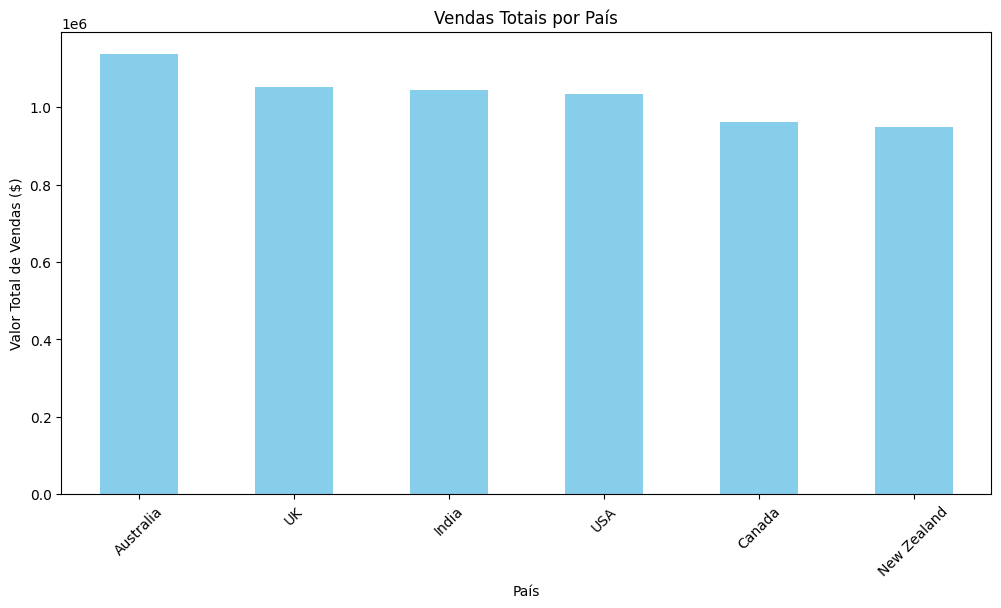

In [5]:
# Vendas totais por país
sales_by_country = df.groupby('Country')['Amount'].sum().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
sales_by_country.plot(kind='bar', color='skyblue')
plt.title('Vendas Totais por País')
plt.xlabel('País')
plt.ylabel('Valor Total de Vendas ($)')
plt.xticks(rotation=45)
plt.show()

Produtos Mais Vendidos

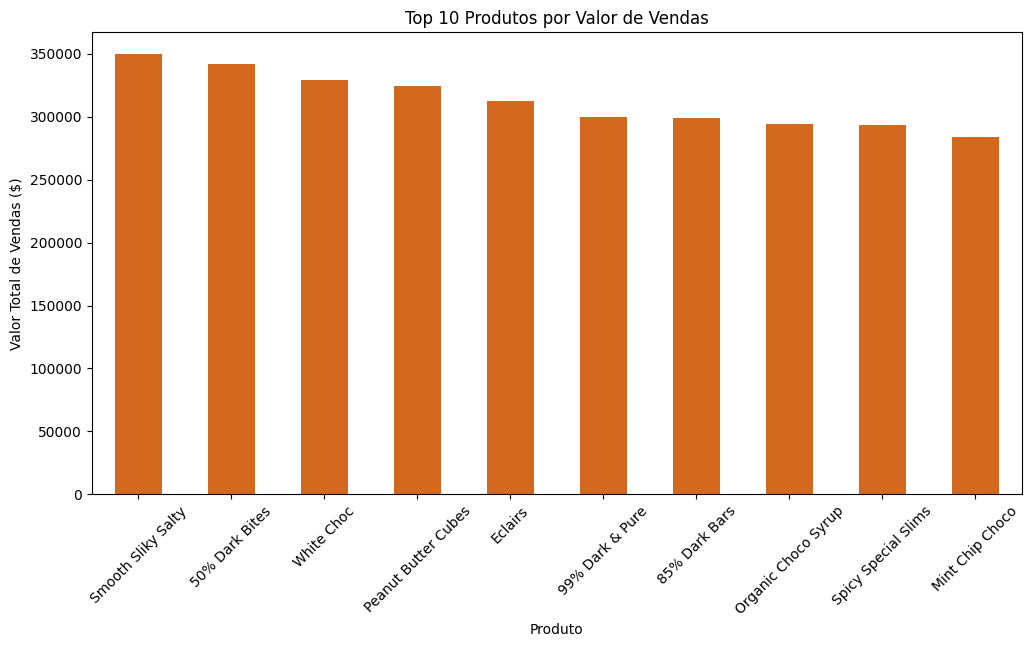

In [6]:
# Top 10 produtos mais vendidos por valor
top_products = df.groupby('Product')['Amount'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 6))
top_products.plot(kind='bar', color='chocolate')
plt.title('Top 10 Produtos por Valor de Vendas')
plt.xlabel('Produto')
plt.ylabel('Valor Total de Vendas ($)')
plt.xticks(rotation=45)
plt.show()

Vendas ao Longo do Tempo

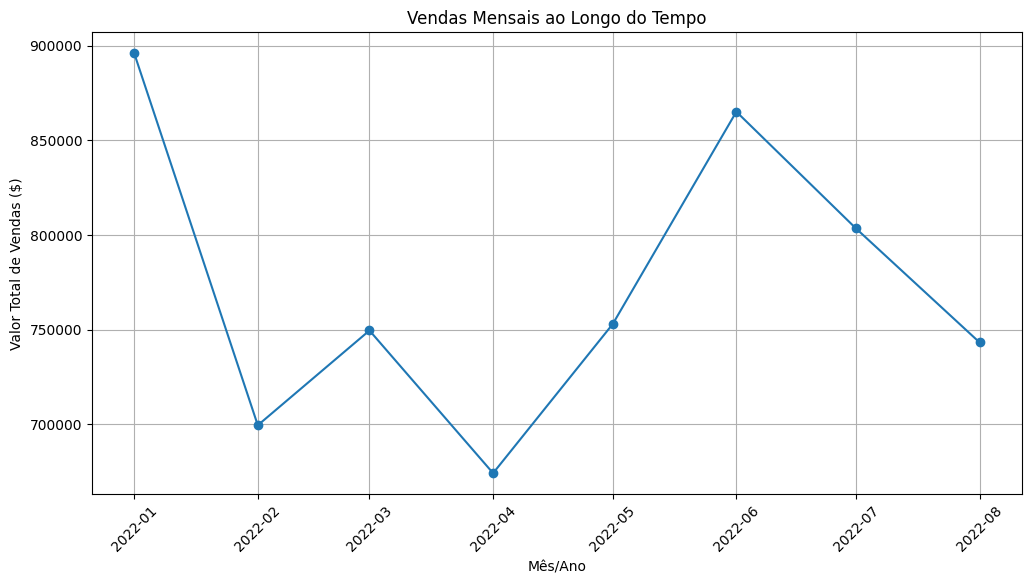

In [7]:
# Vendas mensais ao longo do tempo
monthly_sales = df.groupby(['Year', 'Month'])['Amount'].sum().reset_index()
monthly_sales['Date'] = pd.to_datetime(monthly_sales[['Year', 'Month']].assign(DAY=1))

plt.figure(figsize=(12, 6))
plt.plot(monthly_sales['Date'], monthly_sales['Amount'], marker='o')
plt.title('Vendas Mensais ao Longo do Tempo')
plt.xlabel('Mês/Ano')
plt.ylabel('Valor Total de Vendas ($)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

 Relação entre Quantidade Enviada e Valor de Vendas

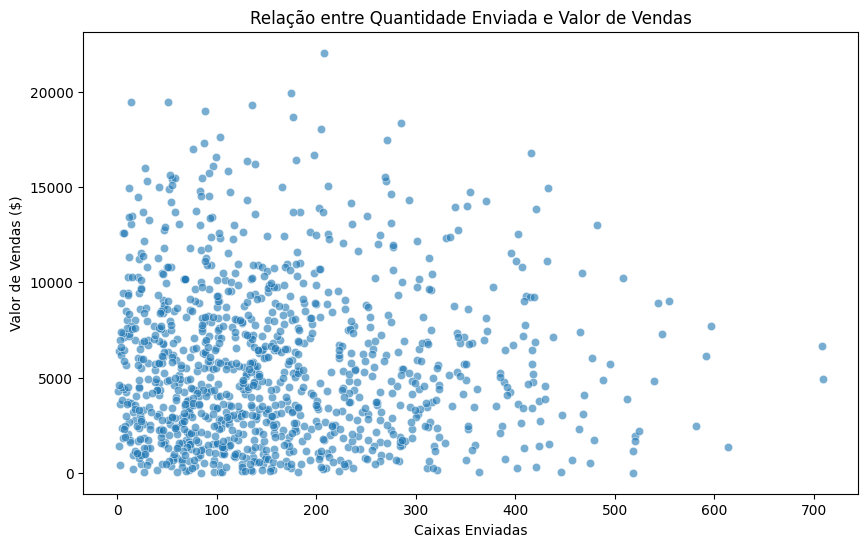


Correlação entre Caixas Enviadas e Valor de Vendas:
               Boxes Shipped    Amount
Boxes Shipped       1.000000 -0.018827
Amount             -0.018827  1.000000


In [8]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Boxes Shipped', y='Amount', alpha=0.6)
plt.title('Relação entre Quantidade Enviada e Valor de Vendas')
plt.xlabel('Caixas Enviadas')
plt.ylabel('Valor de Vendas ($)')
plt.show()

# Calcular correlação
correlation = df[['Boxes Shipped', 'Amount']].corr()
print("\nCorrelação entre Caixas Enviadas e Valor de Vendas:")
print(correlation)

Análise de Vendedores

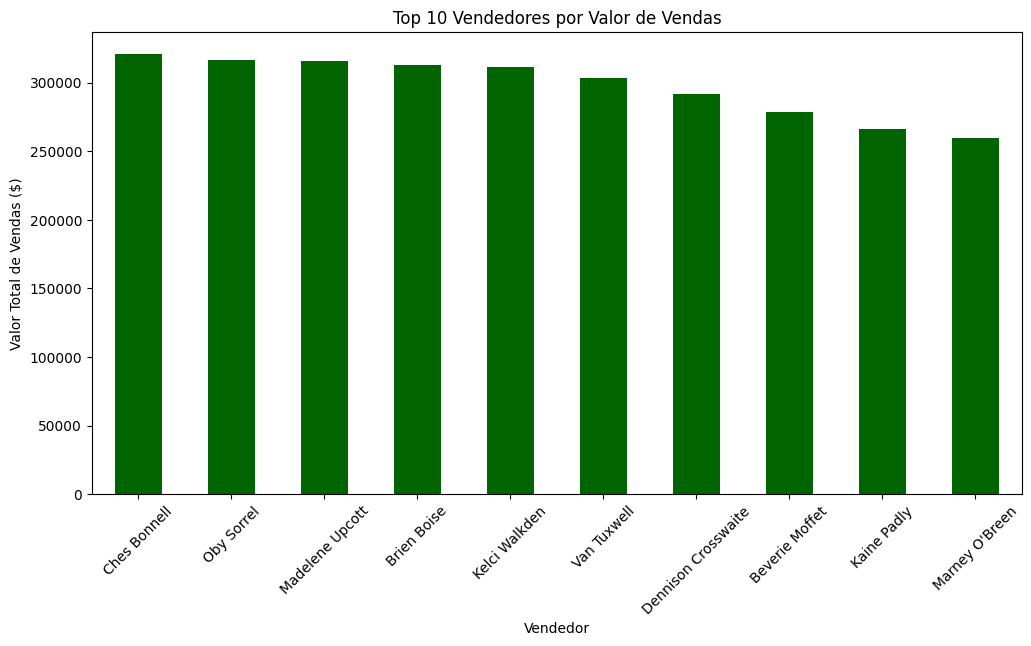

In [9]:
# Top 10 vendedores por valor de vendas
top_sellers = df.groupby('Sales Person')['Amount'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 6))
top_sellers.plot(kind='bar', color='darkgreen')
plt.title('Top 10 Vendedores por Valor de Vendas')
plt.xlabel('Vendedor')
plt.ylabel('Valor Total de Vendas ($)')
plt.xticks(rotation=45)
plt.show()

Distribuição de Vendas por Vendedor

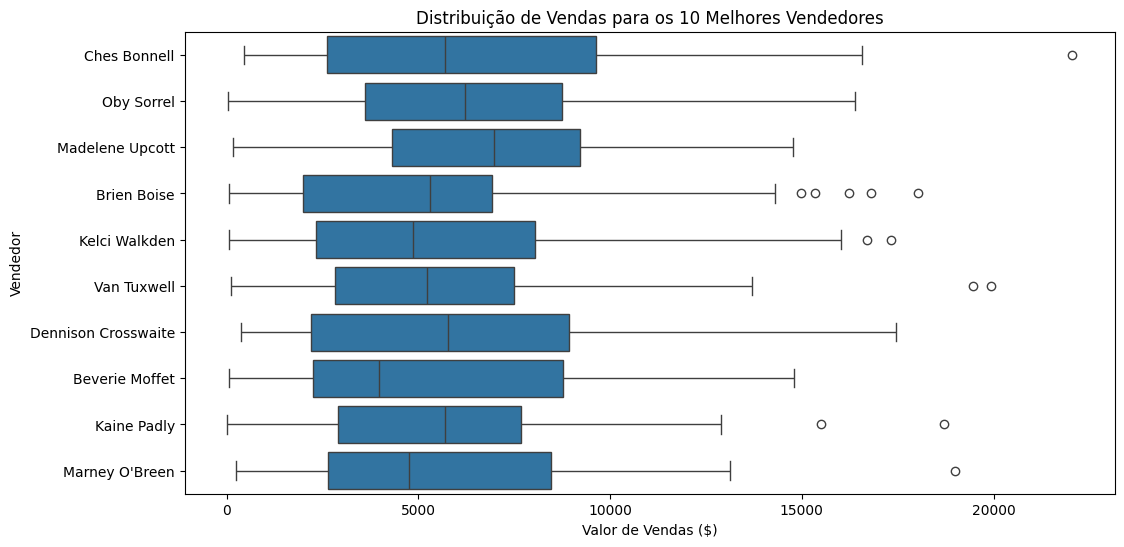

In [10]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Amount', y='Sales Person',
            order=df.groupby('Sales Person')['Amount'].sum().sort_values(ascending=False).index[:10])
plt.title('Distribuição de Vendas para os 10 Melhores Vendedores')
plt.xlabel('Valor de Vendas ($)')
plt.ylabel('Vendedor')
plt.show()

Modelo Preditivo (Regressão Linear)

In [11]:
# Codificar variáveis categóricas
le_country = LabelEncoder()
le_product = LabelEncoder()

df['Country_encoded'] = le_country.fit_transform(df['Country'])
df['Product_encoded'] = le_product.fit_transform(df['Product'])

# Selecionar features e target
X = df[['Country_encoded', 'Product_encoded', 'Boxes Shipped', 'Month']]
y = df['Amount']

# Dividir em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Treinamento do Modelo

In [12]:
# Criar e treinar o modelo
model = LinearRegression()
model.fit(X_train, y_train)

# Fazer previsões
y_pred = model.predict(X_test)

Avaliação do Modelo

Erro Quadrático Médio (MSE): 16461409.12
Coeficiente de Determinação (R²): -0.01


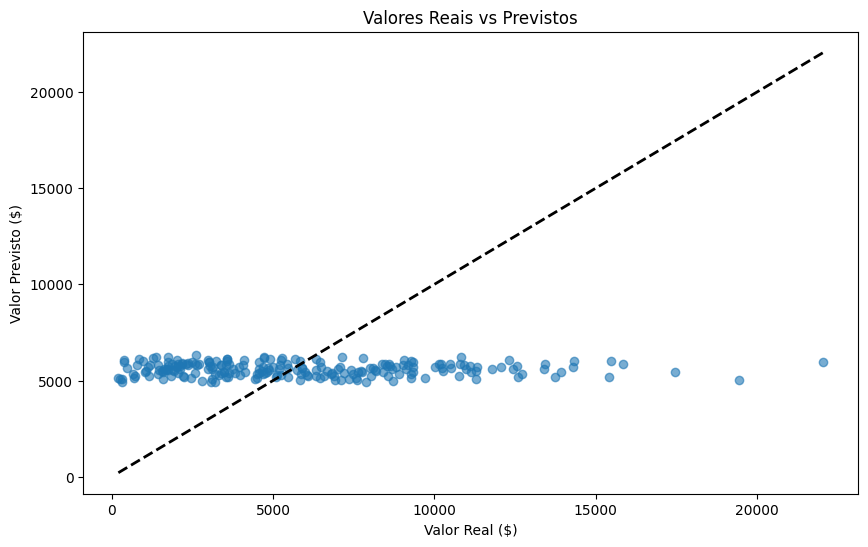

In [14]:
# Calcular métricas
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Erro Quadrático Médio (MSE): {mse:.2f}")
print(f"Coeficiente de Determinação (R²): {r2:.2f}")

# Plotar valores reais vs previstos
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Valor Real ($)')
plt.ylabel('Valor Previsto ($)')
plt.title('Valores Reais vs Previstos')
plt.show()

Exportando Dados

In [15]:
novo_arquivo_csv = "Chocolate_Sales_atualizado.csv"

df.to_csv(novo_arquivo_csv, index=False)
print(f"\nDataFrame modificado exportado para: {novo_arquivo_csv}")


DataFrame modificado exportado para: Chocolate_Sales_atualizado.csv


In [16]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive
